In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import ifft, fft, fftfreq
import pandas as pd
from scipy.optimize import minimize
from cc50 import mag_func

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 9.41048290792529
        x: [-1.588e-01  5.951e+00  3.428e+00 -6.000e+06]
      nit: 22
      jac: [-1.187e-01  1.639e-04 -6.640e-03 -1.192e-07]
 hess_inv: [[ 1.113e-03  2.498e-01 -1.449e-02  4.586e-05]
            [ 2.498e-01  7.566e+01 -2.760e+00  1.448e-02]
            [-1.449e-02 -2.760e+00  2.011e-01 -4.910e-04]
            [ 4.586e-05  1.448e-02 -4.910e-04  1.000e+00]]
     nfev: 302
     njev: 58


c:\Users\kolaj\OneDrive\Desktop\WYSE research\cc50.py:23: RuntimeWarning: divide by zero encountered in log10
  mag = resistive_ratio*10**(-1*10**(param[0]*(np.log10(np.abs(freq)) - param[1])))


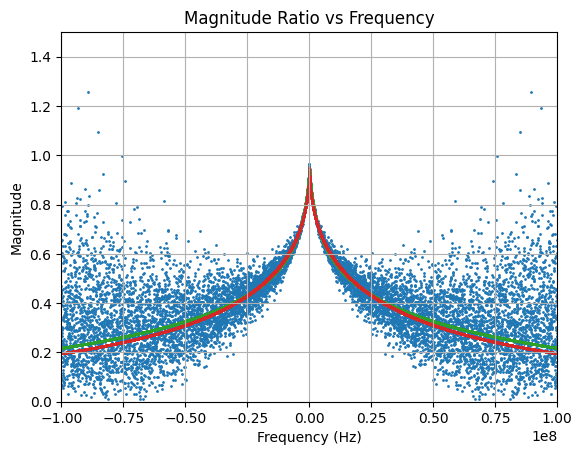

In [18]:
Short_cable_data = np.array(pd.read_csv('SquareWave_ShortCable_10KHz_1V.csv'))
Long_cable_data = np.array(pd.read_csv('SquareWave_LongCable_10KHz_1V.csv'))

time_isEqual = Short_cable_data[:,0]
num_samples = np.shape(Short_cable_data)[0]
time_span = Short_cable_data[-1,0] - Short_cable_data[0,0]
time_int = time_span / num_samples

# plt.plot(time_isEqual, Short_cable_data[:,1])
# plt.plot(time_isEqual, Long_cable_data[:,1])
# plt.show()

same_freq = fftfreq(num_samples, time_int)
voltage_short = Short_cable_data[:,1]
voltage_long = Long_cable_data[:,1]

time_isEqual = time_isEqual - time_isEqual[0]
voltage_short = voltage_short - np.mean(voltage_short)
voltage_long = voltage_long - np.mean(voltage_long)

ft_short = fft(voltage_short)
ft_long = fft(voltage_long)

magnitude_short = np.abs(ft_short)
magnitude_long = np.abs(ft_long)
phase_short = np.angle(ft_short)
phase_long = np.angle(ft_long)




# for n in range(0,50):
#     print(n, magnitude_short[n])

odd_mask = np.full(len(same_freq), False)
odd_mask[0:len(same_freq)//2:1][5::10] = True
odd_mask[len(same_freq)//2:][6::10] = True



# plt.scatter(same_freq[odd_mask], magnitude_short[odd_mask], s=1)
# plt.xscale("log")
# plt.yscale("log")
# plt.title('ShortCableWave: Magnitude vs Frequency')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')
# plt.grid()
# plt.show()
# plt.scatter(same_freq[odd_mask], magnitude_long[odd_mask], s=1)
# plt.xscale("log")
# plt.yscale("log")
# plt.title('LongCableWave: Magnitude vs Frequency')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')
# plt.grid()
# plt.show() 

# plt.scatter(same_freq[odd_mask], phase_short[odd_mask], s=1)
# plt.title('ShortCableWave: Phase vs Frequency')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Phase (radians)')
# plt.grid()
# plt.xscale("log")
# plt.yscale("log")
# plt.show()
# plt.scatter(same_freq[odd_mask], phase_long[odd_mask], s=1)
# plt.xscale("log")
# plt.yscale("log")
# plt.title('LongCableWave: Phase vs Frequency')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Phase (radians)')
# plt.grid()
# plt.show()

new_mask = np.full(len(same_freq[odd_mask]), True)
new_mask[same_freq[odd_mask] < 0] = False
new_mask[same_freq[odd_mask] > .5e8] = False


magnitude_ratio = magnitude_long / magnitude_short
plt.scatter(same_freq[odd_mask], magnitude_ratio[odd_mask], s=1)
plt.xlim(-1e8,1e8)
plt.ylim(0,1.5)
# plt.xscale("log")
# plt.yscale("log")
plt.title('Magnitude Ratio vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()




# This is the parameterized function you will try to fill in, it's essentially a fancy version of Ax^B + Cx
def param_expfunc(parameters, freq_minimize):
    return np.exp(-parameters[0] * (np.abs(freq_minimize) - parameters[1])) + parameters[2]

def param_func(parameters, freq_minimize):
    return parameters[0] * np.log(parameters[1] * np.abs(freq_minimize) - parameters[3]) + parameters[2]

def objfunc(parameters, freq_minimize, data):
    return np.sum((param_func(parameters, freq_minimize) - data)**2)


freq_minimize = same_freq
output = magnitude_ratio



guessexp = [4.5e-8, -7.3e6,.24]
guess = [-0.55, 5.05,4.8, -6e6]

args = (freq_minimize[odd_mask][new_mask], output[odd_mask][new_mask])



objsolution = minimize(objfunc, guess, args = args)
print(objsolution)
plt.scatter(same_freq[odd_mask][new_mask], param_func(objsolution.x,same_freq)[odd_mask][new_mask], s=1)
plt.scatter(same_freq[odd_mask], param_func(objsolution.x, same_freq)[odd_mask], s=1)
plt.scatter(same_freq[odd_mask], mag_func( [4.920e-01, 8.326e+00], same_freq)[odd_mask], s=1)
# plt.scatter(same_freq[odd_mask], param_func(guess, same_freq)[odd_mask], s=1)
plt.show()


# plt.scatter(same_freq, param_func(guess, same_freq), s=1)
# plt.show()

# 5.13185094e+01 -1.62759995e+04 -2.90908953e+03 -6.00000000e+06


[-1.30000000e-03  3.33333333e-01  1.50000000e-08]


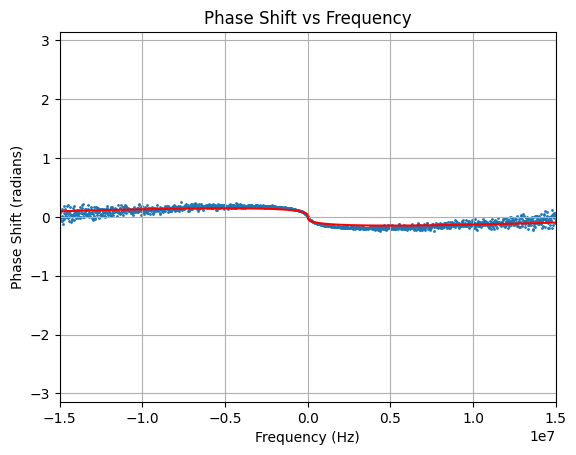

10000.0	-0.008330891617258196
410000.0	-0.0962770646001978
810000.0	-0.13638407179033685
1210000.0	-0.15256087059849932
1610000.0	-0.15792302481785736
2010000.0	-0.18342169457454172
2410000.0	-0.18098832285635935
2810000.0	-0.18735060786837532
3210000.0	-0.18114173850344972
3610000.0	-0.19310103616488394
4010000.0	-0.19138697016290096
4410000.0	-0.18832482730417577
4810000.0	-0.18239015199283481
5210000.0	-0.18413085651452432
5610000.0	-0.20594057021005918
6010000.0	-0.18132591237895657
6410000.0	-0.18914405860534833
6810000.0	-0.22884903336328466
7210000.0	-0.15126397363434596
7610000.0	-0.1675965868666187
8010000.0	-0.0999648974969527
8410000.0	-0.1660927110005408
8810000.0	-0.11055493973826436
9210000.0	-0.14242089007050507
9610000.0	-0.11883316363973107
10010000.0	-0.1412020437542867
10410000.0	-0.10741274079919272
10810000.0	-0.1306522460199222
11210000.0	-0.10535051816654861
11610000.0	-0.1271781993752612
12010000.0	-0.07964826488609944
12410000.0	-0.07634960780375266
12810000.0	

In [19]:
mask = np.full(np.shape(same_freq[odd_mask]), True)
mask[same_freq[odd_mask] < -.25 * (10**8)] = False
mask[same_freq[odd_mask] > .25 * (10**8)] = False

# print(odd_mask[-21:])
phase_shift = phase_long - phase_short
datas = (phase_long - phase_short)[odd_mask]
plt.scatter(same_freq[odd_mask][mask], phase_shift[odd_mask][mask], s=1)
plt.title('Phase Shift vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Shift (radians)')
plt.grid()
plt.xlim(-1.5e7, 1.5e7)
plt.ylim(-np.pi, np.pi)

def odd_power(base, exponent):
    return np.sign(base)*np.power(np.abs(base),exponent)

def Phase_func(parameters, freqs_minimize):
    return parameters[0] * (odd_power(freqs_minimize, parameters[1])) + parameters[2]*freqs_minimize 

def objsfunc(parameters, freq_minimize, datas):
    return np.sum((Phase_func(parameters, freq_minimize) - datas)**2)


guess1 = [-1.3e-3,1/3,1.5e-8]

freqs_minimize = same_freq
outputs = phase_shift

args_phase = (freqs_minimize[odd_mask][mask], outputs[odd_mask][mask])



objsolutions = minimize(objsfunc, guess1, args = args_phase)

print(objsolutions.x)
plt.plot(np.sort(same_freq[odd_mask][mask]), (Phase_func(objsolutions.x,np.sort(same_freq[odd_mask][mask]))), color = "Red")


# plt.plot(np.sort(freqs_minimize[odd_mask][mask]), Phase_func(guess1, np.sort(freqs_minimize[odd_mask][mask])), color = "Orange")
plt.show()

for n in range(len(same_freq[odd_mask][mask])//20):
    print(f"{same_freq[odd_mask][mask][n*20]}\t{phase_shift[odd_mask][mask][n*20]}")

[[0.00000000e+00 9.56000339e-02]
 [2.00000000e-10 9.56000339e-02]
 [4.00000000e-10 6.23900339e-02]
 ...
 [4.99999600e-04 1.28809034e-01]
 [4.99999800e-04 9.56000339e-02]
 [5.00000000e-04 7.89950339e-02]]
[[ 0.00000000e+00 -9.00552002e-03]
 [ 2.00000000e-10 -9.20285200e-02]
 [ 4.00000000e-10 -1.91656520e-01]
 ...
 [ 4.99999600e-04  3.06483480e-01]
 [ 4.99999800e-04  1.90250480e-01]
 [ 5.00000000e-04  9.06224800e-02]]


c:\Users\kolaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


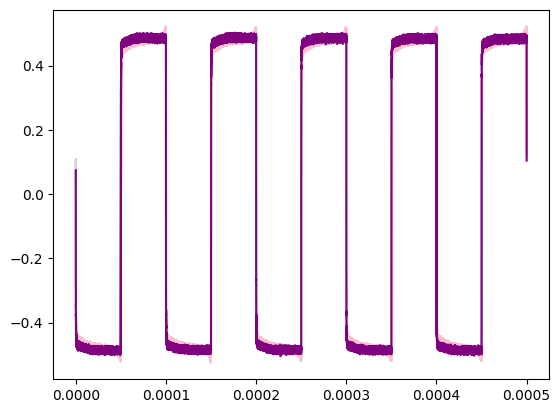

In [20]:
def moving_average(a, n=3) :
    l = (n - 1)//2
    r = n - 1 - l
    a = np.pad(a, (l, r), 'edge')
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def processData(data_long, data_short):
    times_long = data_long[:,0] 
    times_short = data_short[:,0]
    voltageL = data_long[:,1] - np.mean(data_long[:,1]) 
    voltageS = data_short[:,1] - np.mean(data_short[:,1])
    times_long = times_long - times_long[0]
    times_short = times_short - times_short[0]

    processedL = np.array([times_long, voltageL]).T
    processedS = np.array([times_short, voltageS]).T

    return processedL, processedS

X,Y = processData(Long_cable_data, Short_cable_data)
print(X)
print(Y)


def transfer_func(ddata):
    ftvoltz = fft(ddata[:,1])
    magnitude = np.abs(ftvoltz)
    phase = np.angle(ftvoltz)
    times = ddata[:,0]
    samples = len(times)
    span = times[-1] - times[0]
    interval = span/samples
    frequency = fftfreq(samples, interval)
    transferM = magnitude * param_func(objsolution.x, frequency)
    transferP = phase + Phase_func(objsolutions.x, frequency)
    transfer = ifft(transferM * np.exp(1j * transferP))

    return transfer

def error_func(func, transferred_func):
    difference = np.abs(func - transferred_func)
    difference = np.mean(difference)
    return difference

transfer_magnitude = magnitude_short * param_func(objsolution.x, same_freq)
transfer_Phase = phase_short + Phase_func(objsolutions.x,same_freq)

transferred = ifft(transfer_magnitude * np.exp(1j * transfer_Phase))


plt.plot(time_isEqual, transferred, color = "Cyan")
plt.plot(time_isEqual, transfer_func(Y), color = "Pink")
plt.plot(time_isEqual, moving_average(a=voltage_long, n = 15), color = "Purple")
# plt.xscale("log")
# plt.yscale("log")
plt.show()


c:\Users\kolaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


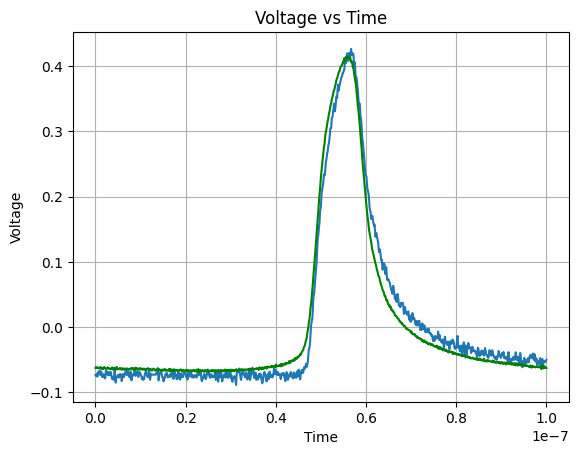

In [21]:
PulseDataL = np.array(pd.read_csv("Pulse_LongCable_10KHz_1V_W_10ns.csv"))
PulseDataS = np.array(pd.read_csv("Pulse_ShortCable_10KHz_1V_W_10ns.csv"))


PulseL,PulseS = processData(PulseDataL, PulseDataS)

plt.plot(PulseL[:,0], PulseL[:,1])
plt.plot(PulseS[:,0], transfer_func(PulseS), color = "Green")
plt.title('Voltage vs Time')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.grid()
plt.show()

ratio_mask = np.full(len(freq_minimize[odd_mask]), True)

ratio_mask[freq_minimize[odd_mask] > 1e7] = False
ratio_mask[freq_minimize[odd_mask] < 1e4] = False

def sig_param(param, freqs):
    return param[0] * (np.exp(param[1] * np.abs(freqs)) + 1)**(-1) + param[2]

def sig_obj(param, freqs_minimize, data):
    return np.sum((data - sig_param(param, freqs_minimize))**2)

guess_sig = [-0.3, -1e-6, 1]

sig_args = (freq_minimize[odd_mask][ratio_mask], magnitude_ratio[odd_mask][ratio_mask])

guess_sig_function = sig_param(guess_sig, freq_minimize[odd_mask][ratio_mask])

sig_solution = minimize(sig_obj, guess_sig, args=sig_args)

plt.scatter(freq_minimize[odd_mask][ratio_mask], magnitude_ratio[odd_mask][ratio_mask], s=1)
plt.plot(freq_minimize[odd_mask][ratio_mask], guess_sig_function, color="orange")
plt.plot(freq_minimize[odd_mask][ratio_mask], sig_param(sig_solution.x, freq_minimize[odd_mask][ratio_mask]), color="red")
plt.show()

print(f"Guess: A = {guess_sig[0]}, B = {guess_sig[1]}, C = {guess_sig[2]}")
print(f"Result: A = {sig_solution.x[0]}, B = {sig_solution.x[1]}, C = {sig_solution.x[2]}") 

c:\Users\kolaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


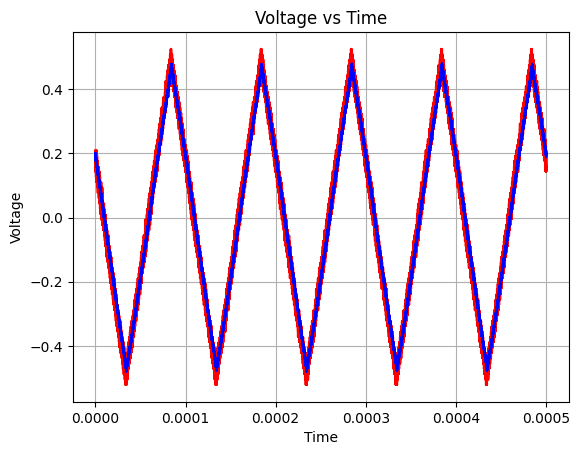

c:\Users\kolaj\OneDrive\Desktop\WYSE research\cc50.py:23: RuntimeWarning: divide by zero encountered in log10
  mag = resistive_ratio*10**(-1*10**(param[0]*(np.log10(np.abs(freq)) - param[1])))


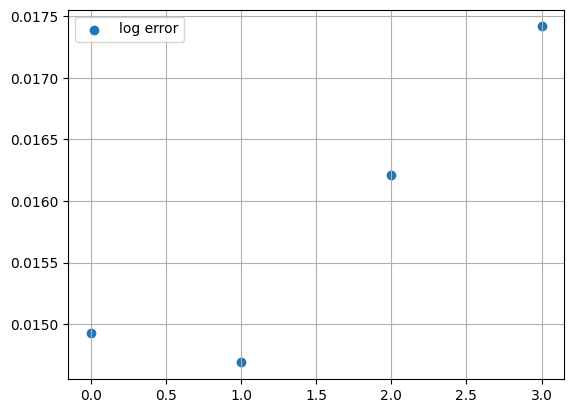

In [41]:
TriangleDataL = np.array(pd.read_csv("TriangleWave_LongCable_10KHz_1V.csv"))
TriangleDataS = np.array(pd.read_csv("TriangleWave_ShortCable_10KHz_1V.csv"))

TriangleL, TriangleS = processData(TriangleDataL, TriangleDataS)

plt.plot(TriangleL[:,0], TriangleL[:,1], color = "Red")
plt.plot(TriangleS[:,0], transfer_func(TriangleS), color = "Blue")
plt.title("Voltage vs Time")
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.grid()
plt.show()

def objexpfunc(parameters, freq_minimize, data):
    return np.sum((param_expfunc(parameters, freq_minimize) - data)**2)

def objYifunc(parameters, freq_minimize, data):
    return np.sum((mag_func(parameters, freq_minimize) - data)**2)

objexpsolution = minimize(objexpfunc, guessexp, args = args)
objYiSolution = [4.920e-01, 8.326e+00]

def transfer_expfunc(ddata):
    ftvoltz = fft(ddata[:,1])
    magnitude = np.abs(ftvoltz)
    phase = np.angle(ftvoltz)
    times = ddata[:,0]
    samples = len(times)
    span = times[-1] - times[0]
    interval = span/samples
    frequency = fftfreq(samples, interval)
    transferM = magnitude * param_expfunc(objexpsolution.x, frequency)
    transferP = phase + Phase_func(objsolutions.x, frequency)
    transfer = ifft(transferM * np.exp(1j * transferP))

    return transfer

def transfer_LEfunc(ddata):
    ftvoltz = fft(ddata[:,1])
    magnitude = np.abs(ftvoltz)
    phase = np.angle(ftvoltz)
    times = ddata[:,0]
    samples = len(times)
    span = times[-1] - times[0]
    interval = span/samples
    frequency = fftfreq(samples, interval)
    transferM = magnitude * mag_func(objYiSolution, frequency)
    transferP = phase + Phase_func(objsolutions.x, frequency)
    transfer = ifft(transferM * np.exp(1j * transferP))

    return transfer

def transfer_Sigfunc(ddata):
    ftvoltz = fft(ddata[:,1])
    magnitude = np.abs(ftvoltz)
    phase = np.angle(ftvoltz)
    times = ddata[:,0]
    samples = len(times)
    span = times[-1] - times[0]
    interval = span/samples
    frequency = fftfreq(samples, interval)
    transferM = magnitude * sig_param(sig_solution.x, frequency)
    transferP = phase + Phase_func(objsolutions.x, frequency)
    transfer = ifft(transferM * np.exp(1j * transferP))

    return transfer

# print(f"Log Sine Error: {error_func(Long_cable_data[:,1], transfer_func(Short_cable_data))}")
# print(f"Log Square Error: {error_func(X[:,1], transfer_func(Y))}")
# print(f"Log Pulse Error: {error_func(PulseL[:,1], transfer_func(PulseS))}")
# print(f"Log Triangle Error: {error_func(TriangleL[:,1], transfer_func(TriangleS))}")

# print(f"Exponential Sine Error: {error_func(Long_cable_data[:,1], transfer_expfunc(Short_cable_data))}")
# print(f"Exponential Square Error: {error_func(X[:,1], transfer_expfunc(Y))}")
# print(f"Exponential Pulse Error: {error_func(PulseL[:,1], transfer_expfunc(PulseS))}")
# print(f"Exponential Triangle Error: {error_func(TriangleL[:,1], transfer_expfunc(TriangleS))}")

# print(f"Log Exponential Sine Error: {error_func(Long_cable_data[:,1], transfer_LEfunc(Short_cable_data))}")
# print(f"Log Exponential Square Error: {error_func(X[:,1], transfer_LEfunc(Y))}")
# print(f"Log Exponential Pulse Error: {error_func(PulseL[:,1], transfer_LEfunc(PulseS))}")
# print(f"Log Exponential Triangle Error: {error_func(TriangleL[:,1], transfer_LEfunc(TriangleS))}")

# print(f"Sig Sine Error: {error_func(Long_cable_data[:,1], transfer_Sigfunc(Short_cable_data))}")
# print(f"Sig Square Error: {error_func(X[:,1], transfer_Sigfunc(Y))}")
# print(f"Sig Pulse Error: {error_func(PulseL[:,1], transfer_Sigfunc(PulseS))}")
# print(f"Sig Triangle Error: {error_func(TriangleL[:,1], transfer_Sigfunc(TriangleS))}")



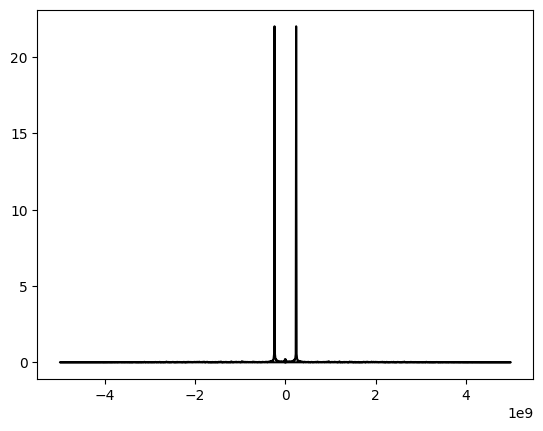

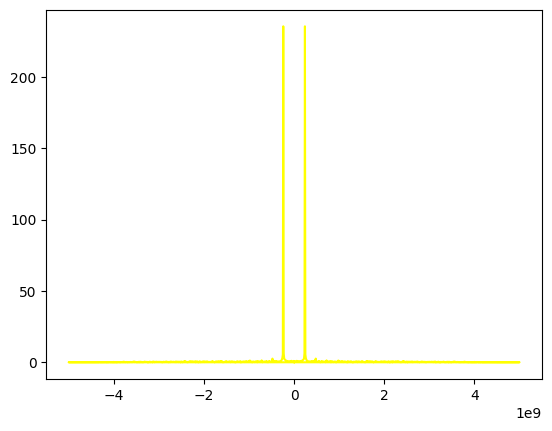

magnitude value at maximum magnitude index 22.022103378539644
magnitude value at maximum magnitude index 235.27938890467402
maximum magnitude value at frequency 240000000.0 Hz


c:\Users\kolaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


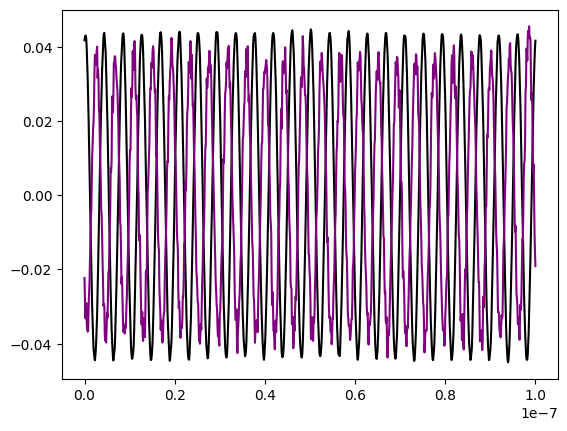

In [23]:
SineL_data = np.array(pd.read_csv("SineWave_LongCable_240MHz_1Vpp.csv"))
SineS_data = np.array(pd.read_csv("SineWave_ShortCable_240MHz_1Vpp.csv"))

SineL, SineS = processData(SineL_data, SineS_data)

# plt.plot(SineL[:,0], SineL[:,1], color = "Red")
# plt.show()

# plt.plot(SineS[:,0], SineS[:,1], color = "Purple")
# plt.show()

samplesB = len(SineS[:,0])
spanB = SineS[-1,0] - SineS[0,0]
intervalB = spanB/samplesB
frequencyB = fftfreq(samplesB, intervalB)

ftSineL = fft(SineL[:,1])
ftSineS = fft(SineS[:,1])
magnitudeSinL = np.abs(ftSineL)
magnitudeSinS = np.abs(ftSineS)

plt.plot(frequencyB, magnitudeSinL, color = "Black")
plt.show()
plt.plot(frequencyB, magnitudeSinS, color = "Yellow")
plt.show()

maxindexL = np.argmax(magnitudeSinL)
maxindexS = np.argmax(magnitudeSinS)
print(f"magnitude value at maximum magnitude index {magnitudeSinL[maxindexL]}")
print(f"magnitude value at maximum magnitude index {magnitudeSinS[maxindexS]}")
print(f'maximum magnitude value at frequency {frequencyB[maxindexL]} Hz')

plt.plot(SineL[:,0], SineL[:,1], color = "Black")
plt.plot(SineS[:,0], transfer_func(SineS), color = "Purple")
plt.show()







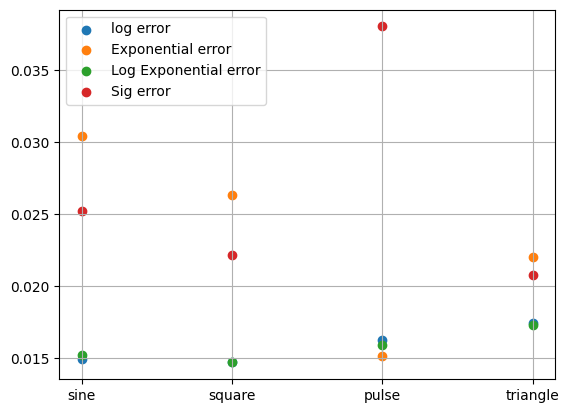

In [44]:
logA = [error_func(Long_cable_data[:,1], transfer_func(Short_cable_data)),error_func(X[:,1], transfer_func(Y)),error_func(PulseL[:,1], transfer_func(PulseS)), error_func(TriangleL[:,1], transfer_func(TriangleS))]
expA = [error_func(Long_cable_data[:,1], transfer_expfunc(Short_cable_data)), error_func(X[:,1], transfer_expfunc(Y)), error_func(PulseL[:,1], transfer_expfunc(PulseS)), error_func(TriangleL[:,1], transfer_expfunc(TriangleS))]
LogExpA = [error_func(Long_cable_data[:,1], transfer_LEfunc(Short_cable_data)), error_func(X[:,1], transfer_LEfunc(Y)), error_func(PulseL[:,1], transfer_LEfunc(PulseS)), error_func(TriangleL[:,1], transfer_LEfunc(TriangleS))]
SigA = [error_func(Long_cable_data[:,1], transfer_Sigfunc(Short_cable_data)), error_func(X[:,1], transfer_Sigfunc(Y)), error_func(PulseL[:,1], transfer_Sigfunc(PulseS)), error_func(TriangleL[:,1], transfer_Sigfunc(TriangleS))]

plt.scatter([0, 1, 2, 3], logA, label='log error')#, color = "Purple")
plt.scatter([0,1,2,3], expA, label= 'Exponential error')#, color = "Red")
plt.scatter([0,1,2,3], LogExpA, label= 'Log Exponential error')#, color = "Blue")
plt.scatter([0,1,2,3], SigA, label= 'Sig error')#, color= "Black")
plt.xticks([0, 1, 2, 3], ['sine', 'square', 'pulse', 'triangle'])
plt.legend()
plt.grid()
plt.show()
